# Euler's method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, exp
%matplotlib inline

## Introduction

This notebook supports the MATH2600 (Numerical Analysis) module taught at the University of Leeds.

We want to apply Euler's method to the differential equation 
$$ y'(t) = \cos(t) - y(t), \qquad y(0) = 0. $$
The exact solution of this equation is
$$ y(t) = \frac12 \bigl( \cos(t) + \sin(t) - \mathrm{e}^{-t} \bigr). $$

Let us evaluate the exact solution at time $t=1$:

In [2]:
exact_at_time_1 = 1/2 * (cos(1) + sin(1) - exp(-1))
print(exact_at_time_1)

0.506946924752297


## Euler's method with h = 1

First, apply Euler's method with step size $h=1$, so that after one step we arrive at time $t=1$. Define the step size and the initial condition:

In [3]:
y0 = 0
t0 = 0
h = 1

Then, do one step of the Euler's method $y_1 = y_0 + h f(t_0, y_0)$. For our differential equation, we have $f(t,y) = cos(t) - y$:

In [4]:
y1 = y0 + h * (cos(t0) - y0)
print(y1)

1.0


Thus, the result of Euler's method is 1. We can compute the error by subtracting the exact solution:

In [5]:
print(y1 - exact_at_time_1)

0.49305307524770303


## Euler's method with h = 1/2

We now apply Euler's method with step size $h = \frac12$. We need to take two steps to arrive at time $t=1$. First define the step size and the initial condition:

In [6]:
y0 = 0
t0 = 0
h = 1/2

Do the first step:

In [7]:
y1 = y0 + h * (cos(t0) - y0)
t1 = t0 + h
print(y1)

0.5


Do the second step:

In [8]:
y2 = y1 + h * (cos(t1) - y1)
t2 = t1 + h
print(y2)

0.6887912809451864


This is the approximation of $y(t)$ at time $t=1$ that Euler's method with $h=\frac12$ gives. We can again compute the error:

In [9]:
print(y2 - exact_at_time_1)

0.1818443561928894


The error has gone down from 0.493 (with $h=1$) to 0.182 (with $h=\frac12$).

## Euler's method with h = 1/4

We now apply Euler's method with step size $h = \frac14$. We need to take four steps to arrive at time $t=1$. First define the step size and the initial condition:

In [10]:
y0 = 0
t0 = 0
h = 1/4

Do the first step:

In [11]:
y1 = y0 + h * (cos(t0) - y0)
t1 = t0 + h
print(y1)

0.25


Do the second step:

In [12]:
y2 = y1 + h * (cos(t1) - y1)
t2 = t1 + h
print(y2)

0.42972810542766116


Do the third step:

In [13]:
y3 = y2 + h * (cos(t2) - y2)
t3 = t2 + h
print(y3)

0.5416917195433391


Do the fourth step:

In [14]:
y4 = y3 + h * (cos(t3) - y3)
t4 = t3 + h
print(y4)

0.5891910068759595


This is the approximation of $y(t)$ at time $t=1$ that Euler's method with $h=\frac14$ gives. We can again compute the error:

In [15]:
print(y4 - exact_at_time_1)

0.08224408212366252


The error has gone down from 0.182 (with $h=\frac12$) to 0.082 (with $h=\frac14$). Euler's method is first order, so we expect that if we halve the step size, the error is also (roughly) halved.

We can also compare the numerical solution with the exact solution for other values of $t$. In the graph below, the thick blue dots are the four values that Euler's method with $h=\frac14$ gives and the green curve is the exact solution. Euler's method more or less follows the exact solutions.

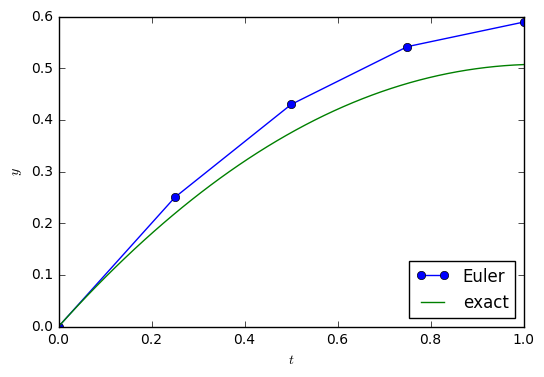

In [16]:
t_list = np.linspace(0, 1)
exact_y_list = [1/2*(sin(t) + cos(t) - exp(-t)) for t in t_list]

plt.plot([t0,t1,t2,t3,t4], [y0,y1,y2,y3,y4], 'o-')
plt.plot(t_list, exact_y_list, '-')
plt.legend(['Euler', 'exact'], loc='lower right')
plt.xlabel('$t$')
plt.ylabel('$y$');

## Dependency of error on step size

I now want to investigate more precisely how the error at time $t=1$ depends on the step size $h$. I start with $h=1$ and compute the error at time $t=1$, then I halve the step size and compute the error again, and I repeat this a couple of times. Note that we compute the error at a fixed time, so this is the *global* error, not the *local* error.

The results are as follows:

In [17]:
h_list = []
error_list = []

for k in range(10):
    y = 0
    t = 0
    h = 1 / 2**k
    for i in range(2**k):
        y = y + h * (cos(i * h) - y)
    error = y - exact_at_time_1
    print('h = {:.4f}   error = {:.6f}'. format(h, error))
    h_list.append(h)
    error_list.append(error)

h = 1.0000   error = 0.493053
h = 0.5000   error = 0.181844
h = 0.2500   error = 0.082244
h = 0.1250   error = 0.039357
h = 0.0625   error = 0.019276
h = 0.0312   error = 0.009542
h = 0.0156   error = 0.004747
h = 0.0078   error = 0.002368
h = 0.0039   error = 0.001182
h = 0.0020   error = 0.000591


The first three rows we already computed above. As I said, we expect that in the limit when $h \to 0$, the error halves if the step size $h$ is halved. Indeed, the error in a row is about half the error in the row above, and this approximation is increasingly exact when we go lower down in the table.

In order to get a better view on these numbers, it may be helpful to plot them in a graph:

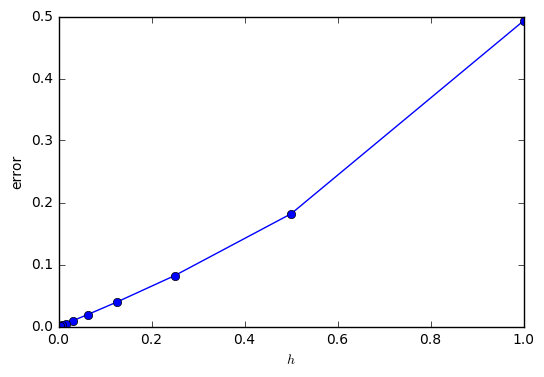

In [18]:
plt.plot(h_list, error_list, '-o')
plt.xlabel('$h$')
plt.ylabel('error');

Most of the points are bunched together near the origin. A logarithmic graph represents the results more clearly:

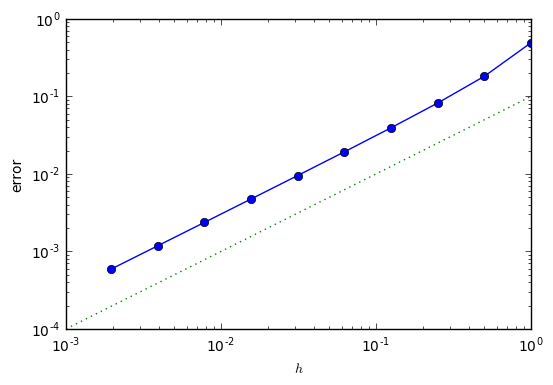

In [19]:
plt.loglog(h_list, error_list, '-o')
plt.loglog([1e-3, 1], [1e-4, 1e-1], ':')
plt.xlabel('$h$')
plt.ylabel('error');

For a first-order method, the error is approximately proportional to the step size: 
$$ \mathrm{error} = \mathrm{constant} \cdot h \iff \log(\mathrm{error}) = \log(h) + \log(\mathrm{constant}). $$ 
So we expect that the relationship is shown on a logarithmic graph with slope 1.

In the above plot, the dotted line is a reference line of slope 1. The thick blue dots are the error committed by Euler's method for various step sizes. We see that the blue dots are indeed on a line parallel to the reference line (except for the last point). This shows that Euler's method is indeed of order 1.

## Stiff equations and stability problems

I also want to briefly discuss the stability problems that occur for some equations. For this, I will use a variant of the equation we considered up to now. The new equation is:
$$ y'(t) = 50 \bigl( \cos(t) - y(t) \bigr), \qquad y(0) = \frac{2250}{2501}. $$
The exact solution of this equation is
$$ y(t) = \frac{2500}{2501} \bigl( \cos(t) + \frac{1}{50} \sin(t) - \frac{1}{10} \mathrm{e}^{-50t} \bigr). $$
This is a famous equation, because it is the equation that Curtiss and Hirschfelder used in 1952 to explain why Euler's method (and many other methods) have stability problems when solving some equations.

First I want to evaluate the exact solution for many values of $t$:

In [20]:
t_list_exact = np.linspace(0, 1, num=1000)
y_list_exact = [2500/2501*(cos(t) + 1/50 * sin(t) - 1/10*exp(-50*t)) for t in t_list_exact]

Then, I compute an approximate solution using Euler's method with step size $h=1/100$ and plot the results.

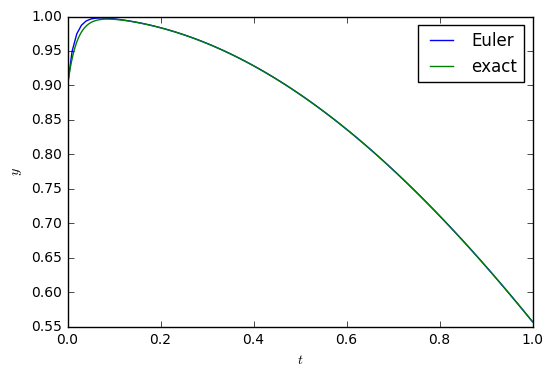

In [21]:
num_steps = 100
h = 1 / num_steps
y = 2250/2501
y_list = [y]
for i in range(num_steps):
    y = y + h * 50 * (cos(i * h) - y)
    y_list.append(y)
    
t_list = np.linspace(0, 1, num=num_steps+1, endpoint=True)
plt.plot(t_list, y_list, '-', t_list_exact, y_list_exact, '-')
plt.legend(['Euler', 'exact'], loc='upper right')
plt.xlabel('$t$')
plt.ylabel('$y$');

In the graph, the blue line is the numerical solution computed by Euler's method and the green line is the exact solution. At the start, the blue line is slightly above the green line, but after both attain their maximum, the lines are basically on top of each other. This shows that Euler's method is quite accurate when you use such a small step size. So, let us increase the step size from $h=1/100$ to $h=1/30$.

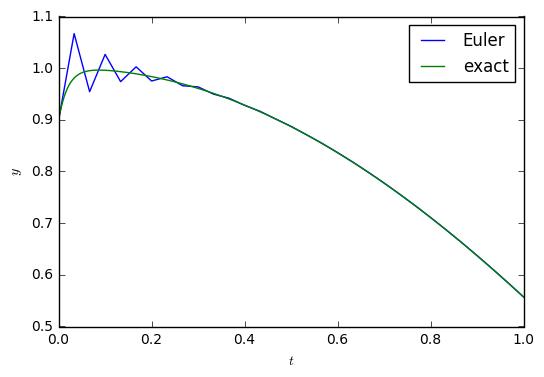

In [22]:
num_steps = 30
h = 1 / num_steps
y = 2250/2501
y_list = [y]
for i in range(num_steps):
    y = y + h * 50 * (cos(i * h) - y)
    y_list.append(y)
    
t_list = np.linspace(0, 1, num=num_steps+1, endpoint=True)
plt.plot(t_list, y_list, '-', t_list_exact, y_list_exact, '-')
plt.legend(['Euler', 'exact'], loc='upper right')
plt.xlabel('$t$')
plt.ylabel('$y$');

We see that there are some issues at the start, but Euler's method goes on the right track pretty quickly and from then it follows the solution closely.

Now, look at what happens if we increae the step size from $h=1/30$ to $h=1/24$.

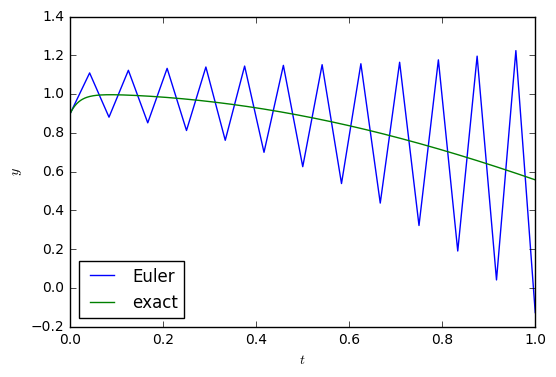

In [23]:
num_steps = 24
h = 1 / num_steps
y = 2250/2501
y_list = [y]
for i in range(num_steps):
    y = y + h * 50 * (cos(i * h) - y)
    y_list.append(y)
    
t_list = np.linspace(0, 1, num=num_steps+1, endpoint=True)
plt.plot(t_list, y_list, '-', t_list_exact, y_list_exact, '-')
plt.legend(['Euler', 'exact'], loc='lower left')
plt.xlabel('$t$')
plt.ylabel('$y$');

With $h=1/24$, the numerical solution does not look like the exact solution at all. This is what stability problems typically look like.

Later in the module, we will learn about other methods (called implicit methods) that resolve this issue.